In [1]:
# importing necessary libraries 

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#! pip install -U kaleido

c:\Users\amark\anaconda3\envs\Py38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# reading the dataframe file

data = pd.read_csv("merged_data.csv")

# reading the first 5 rows of the dataset

data.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Teenhome,Dt_Customer,Country,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,189,104,379,111,189,218,1,4,...,0,6/16/14,SP,0,0,0,0,0,1,0
1,1,0,464,5,64,7,0,37,1,7,...,0,6/15/14,CA,0,1,0,0,0,1,0
2,10476,0,134,11,59,15,2,30,1,3,...,1,5/13/14,US,0,0,0,0,0,0,0
3,1386,0,10,0,1,0,0,0,1,1,...,1,5/11/14,AUS,0,0,0,0,0,0,0
4,5371,0,6,16,24,11,0,34,2,3,...,0,4/8/14,SP,0,0,1,0,0,1,0


## Column Analysis (lets try to do some basic column analysis)

1) Find the different data types present in data
2) find out the number of columns for each data types and also what are the columns under that datatype 
3) Create two list containing numerical and continous columns in it
3) Creating a function column_analysis to perform the task mentioned above

In [3]:
# Creating a function column_analysis to perform the task mentioned above

def column_analysis():
    
    # creating a new data frame for only columns
    df_column = pd.DataFrame(data.dtypes).reset_index()

    # Adding heading to column names 
    df_column.columns=["column_name","dtype"]
    df_column

    print("--------------------------------------------------------------")

    # what are the datatypes and it's value counts
    print(" Datatypes in the dataset and their respective value counts")
    display(df_column["dtype"].value_counts())

    print("--------------------------------------------------------------")
    
  


    # Group the DataFrame by 'dtype' column
    grouped_data = df_column.groupby('dtype')

    #Iterate over groups and display the grouped data
    for dtype, group in grouped_data:
        print("Data Type:", dtype)
        print(group)
        print()
        
    
        
        
        
        
        
# calling the function
column_analysis()


--------------------------------------------------------------
 Datatypes in the dataset and their respective value counts


int64     23
object     5
Name: dtype, dtype: int64

--------------------------------------------------------------
Data Type: int64
            column_name  dtype
0                    ID  int64
1               Recency  int64
2              MntWines  int64
3             MntFruits  int64
4       MntMeatProducts  int64
5       MntFishProducts  int64
6      MntSweetProducts  int64
7          MntGoldProds  int64
8     NumDealsPurchases  int64
9       NumWebPurchases  int64
10  NumCatalogPurchases  int64
11    NumStorePurchases  int64
12    NumWebVisitsMonth  int64
13           Year_Birth  int64
17              Kidhome  int64
18             Teenhome  int64
21         AcceptedCmp1  int64
22         AcceptedCmp2  int64
23         AcceptedCmp3  int64
24         AcceptedCmp4  int64
25         AcceptedCmp5  int64
26             Response  int64
27             Complain  int64

Data Type: object
       column_name   dtype
14       Education  object
15  Marital_Status  object
16         Income   object
19     Dt_Customer  object
20         Country  ob

### Data Preprocessing for Data Visualisation

The Goal would be to do the following:

1) Check for any inconsistency in the dataset
2) check for missing values and handle it with some imputation statergy
3) Check for outliers in the dataset and decide what statergy can be used to replace them 


In [4]:
# Checking the count of missing values before imputation

print(data.isna().sum())



ID                      0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64


#### We have missing values only in Income

##### Below code will be dedicated to processing of only income

In [5]:
# Rename the column " Income " to "Income"
data  = data.rename(columns={" Income ":"Income"})





# creating a function "income_cao_transf" to perform all the task related to preprocessing of income columns

def income_col_transf():
    
     # As we can see the data in Income in in format $84,835 we need to remove the "$" and "," and ".00" convert the datatype of Income to Int64

    # Removing "$"
    data["Income"]=data["Income"].str.replace('$',"")
    # Removing ","
    data["Income"]=data["Income"].str.replace(',',"")
    # Removing ","
    data["Income"]=data["Income"].str.replace('.00',"")


    # filling the NaN values with 0 as string value 
    data["Income"] = data["Income"].fillna("0")

    # converting the datatype pf "Income" from object to int64
    data["Income"] = data["Income"].astype("int64")
    
#calling the function
income_col_transf()


C:\Users\amark\AppData\Local\Temp/ipykernel_4572/1190641217.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Income"]=data["Income"].str.replace('$',"")
C:\Users\amark\AppData\Local\Temp/ipykernel_4572/1190641217.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Income"]=data["Income"].str.replace('.00',"")


In [6]:
#Creating list for categorical and numerical columns (helpful as we can use this same lists anywhere as per our need)


numerical_columns = data.select_dtypes(include=['int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Note : for some reason i was not able to include this block of code in above function for now I will keep it as it is will work on it after some time 

In [7]:
# Checking the count of missing values after imputation (included in the function income_col_transf() )

print(data.isna().sum())

ID                     0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


##### So all the missing values in Income are imputed by 0 as per above code block



#### Here we need to observe one thing i.e before imputation there were 24 missing values in "Income"
1) I replaced all those  24 "Nan" values with "0"(string) 
2) Then I converted the data type of "Income" to Int 
3) After above steps if we check all the data for rows with income zero the o/p is 26 values. So here 2 rows already had zero value 

#### Now I would like to replace all the 26 (0 values) with mean of the "income"

In [8]:
# checking what all Rows have been replaced by 0

data.loc[data['Income'] ==0,"Income"]

134     0
262     0
394     0
449     0
525     0
590     0
899     0
997     0
1096    0
1185    0
1213    0
1312    0
1323    0
1515    0
1558    0
1693    0
1804    0
1858    0
1863    0
1880    0
1967    0
1983    0
2045    0
2139    0
2165    0
2170    0
Name: Income, dtype: int64

In [9]:
# create a variable to store the mean value 
mean_income= round(data["Income"].mean(),0)

# convert the mean_income to int value since all majority of values in the Income column are int datatype as this will maintain the homogenity 
mean_income = mean_income.astype("int64")

'The mean value of the Income Column is : {}'.format(mean_income)


'The mean value of the Income Column is : 50120'

In [10]:
# replacing the 26 values who had income zero with mean_income

data.loc[data['Income'] ==0,"Income"]=mean_income

In [11]:
# checking if the values are replaced correctly in the desired rows
data[data["Income"]==50120]["Income"]

134     50120
262     50120
394     50120
449     50120
525     50120
590     50120
899     50120
997     50120
1096    50120
1185    50120
1213    50120
1312    50120
1323    50120
1515    50120
1558    50120
1693    50120
1804    50120
1858    50120
1863    50120
1880    50120
1967    50120
1983    50120
2045    50120
2139    50120
2165    50120
2170    50120
Name: Income, dtype: int64

#### Lets do some Outlier detection

1) lets plot box plots
2) lets store the output in some file for reference

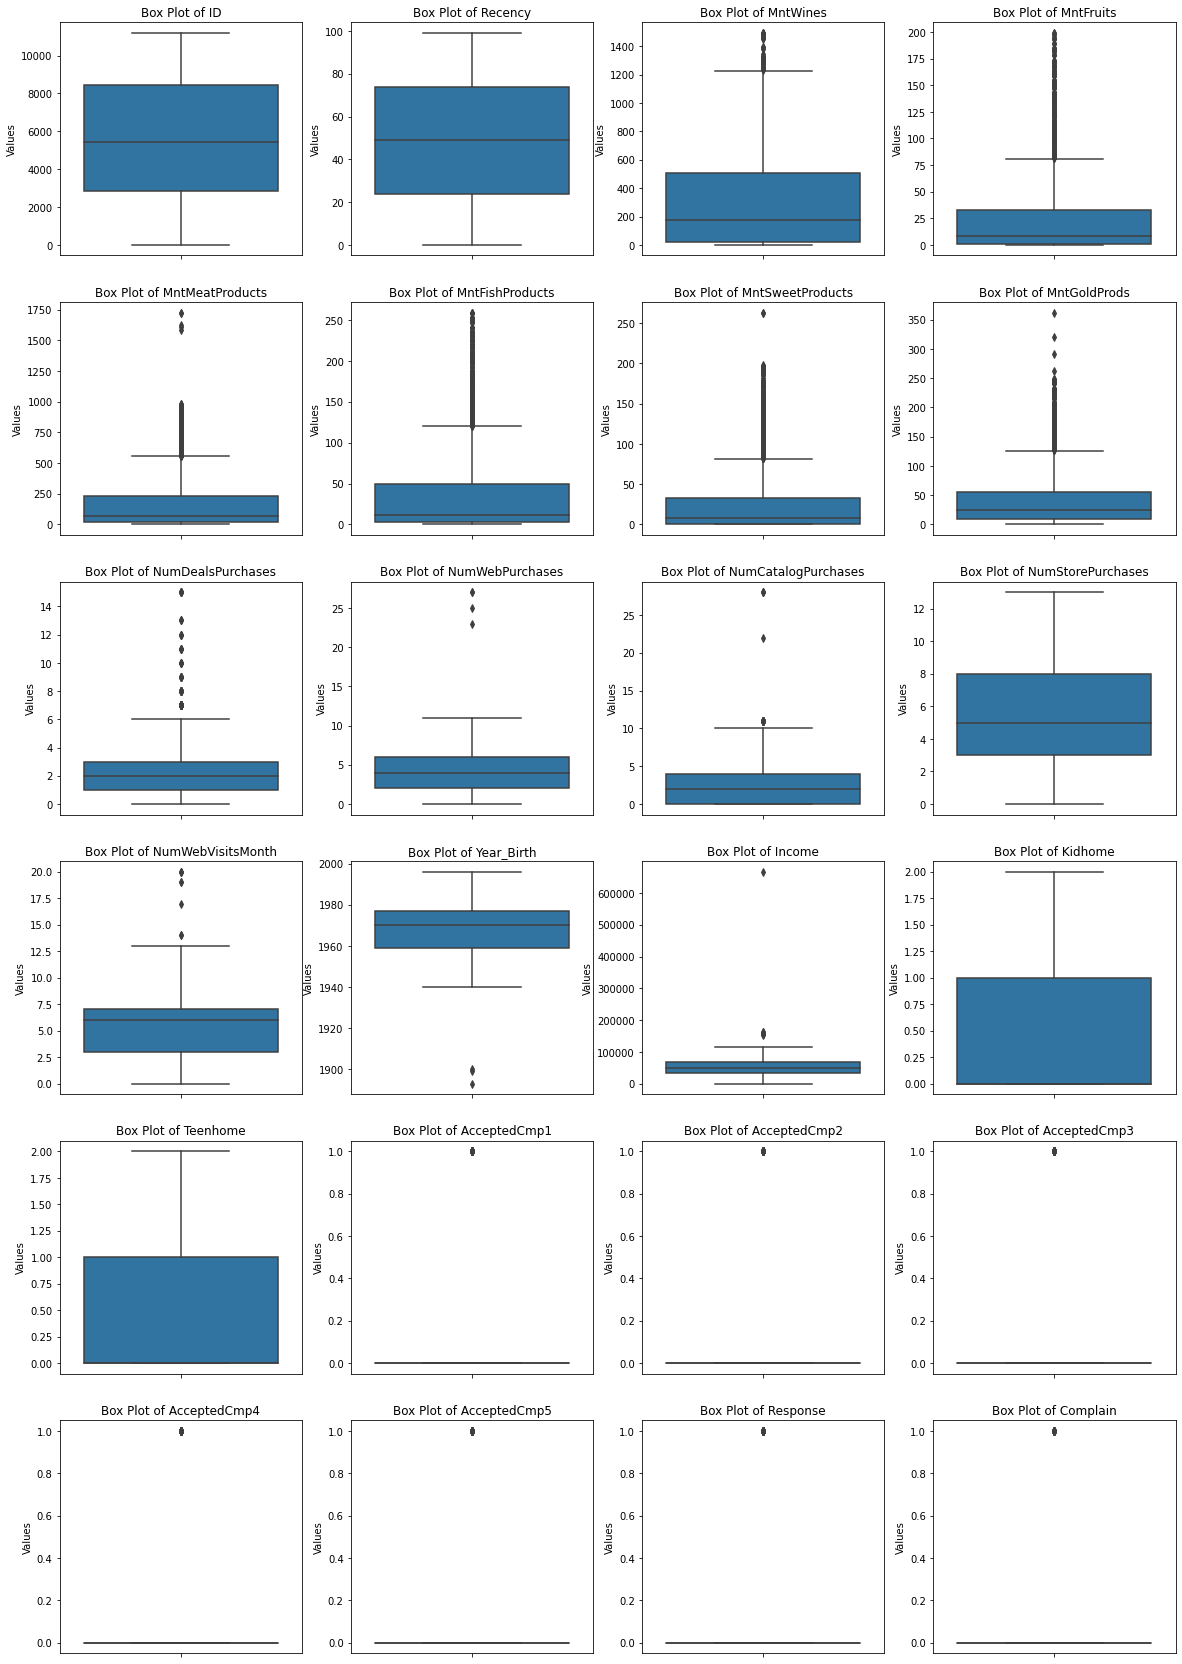

In [12]:
def box_plot():

    plt.figure(figsize=(20,30))
    for index,column in enumerate(numerical_columns):
    
        plt.subplot(6,4,index+1)
        sns.boxplot(data=data, y=column)
        plt.title(f"Box Plot of {column}")
        plt.ylabel("Values")
        
    


# calling the function
box_plot()




## Columns with/without outliers

1) With Outliers : 18 Columns

    MntWines, MntFruits,MntMeatProducts,MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases',NumCatalogPurchases,'NumWebVisitsMonth',
   'Year_Birth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'

2) Without Outliers : 5 columns

    'ID','Recency',NumStorePurchases,Kidhome','Teenhome'
    



In [13]:

#numerical_columns.append("Income")
numerical_columns

['ID',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response',
 'Complain']

### Demographics Analysis

Lets try to do some analysis on demographics

In [14]:
demographics_columns=["Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome","Country","Dt_Customer"]

data[demographics_columns].describe()

,Year_Birth,Income,Kidhome,Teenhome
count,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,50701.947321,0.444196,0.506250
std,11.984069,26298.530365,0.538398,0.544538
min,1893.000000,2.000000,0.000000,0.000000
25%,1959.000000,34176.000000,0.000000,0.000000
50%,1970.000000,50123.500000,0.000000,0.000000
75%,1977.000000,67480.500000,1.000000,1.000000
max,1996.000000,666666.000000,2.000000,2.000000


### INSIGHT FROM ABOVE BLOCK

1) the customer date of birth ranges from (1893-1996) so we dont have any customer after 1996 

2) Salary---> Min : 2$/year, MAX : 6,66,666$/year

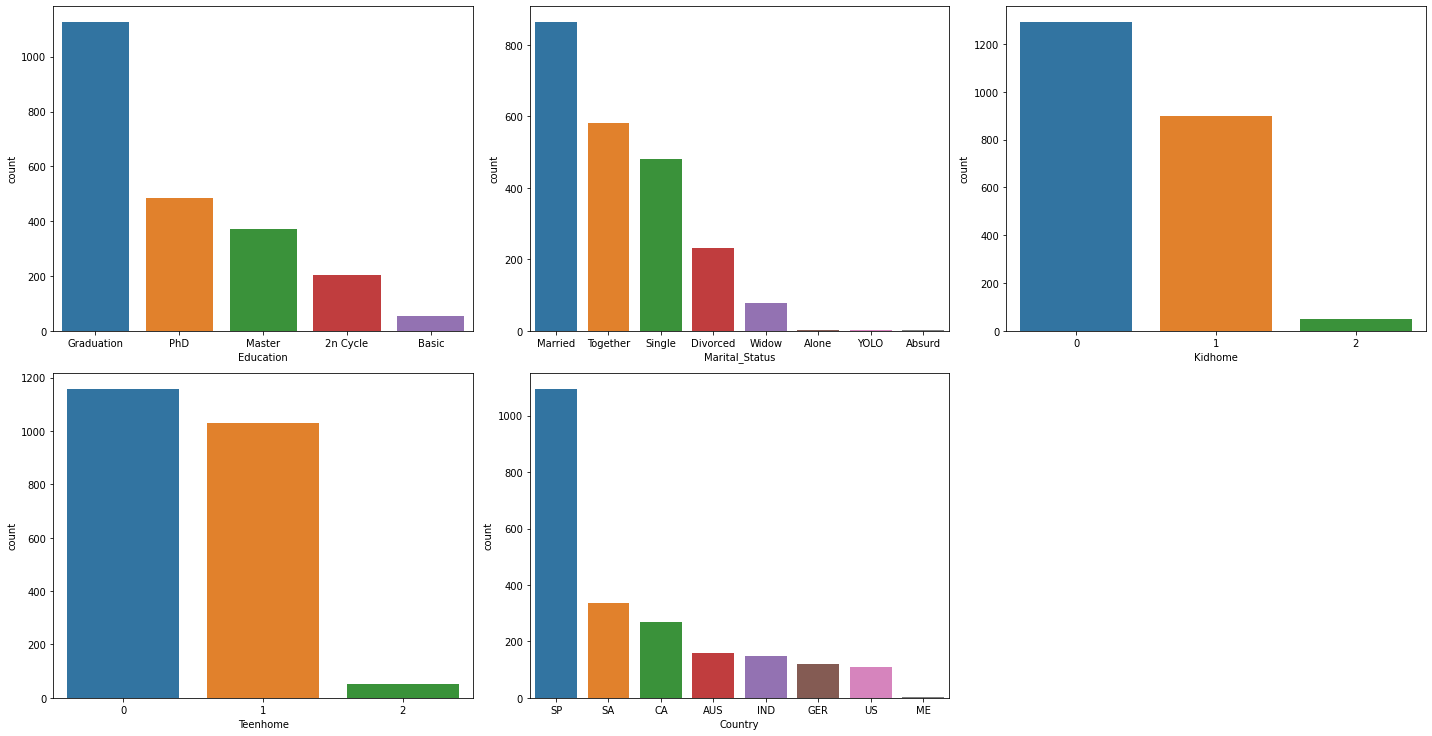

In [15]:
# Let plot some bar graphs to get a gist of what are the count of the categories

# creating a list of demographics columns that can be plotted as count plot and will make sense 

demographics_value_count_columns=["Education","Marital_Status","Kidhome","Teenhome","Country"]

plt.figure(figsize=(20,15))

for i,column in enumerate(demographics_value_count_columns):
    plt.subplot(3,3,i+1)
    sns.countplot(x=column,data=data,order=data[column].value_counts().index)
    
    
plt.tight_layout()



### As we can see above there is no point in ploting count_plot of "Year_Birth" , "Income" and "Dt_Customer"

In [16]:
## Lets create a new column age to know the age of the customers

# Get the current year
current_year = pd.Timestamp.now().year

data["age"]=current_year-data["Year_Birth"]

In [17]:
data["age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

### Lets bin the age in groups

1) 26 - 35 (Age_1)
2) 36 - 60 (Age_2)
3) 61 - 80 (Age_3)
4) > 80 (Age_4)

In [18]:
# create labels and bins

labels=["Age_1","Age_2","Age_3","Age_4"]
bins=[26,36,61,81,float('inf')]

#create new column age_group
data["Age_Group"]=pd.cut(data["age"],bins=bins,labels=labels,right=False)

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

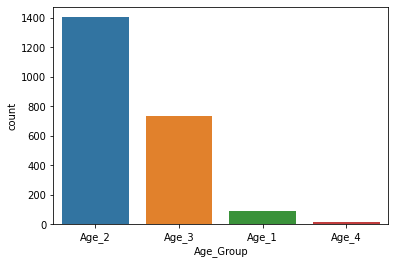

In [19]:
sns.countplot(x="Age_Group",data=data,order=data["Age_Group"].value_counts().index)

In [20]:
data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Country,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,age,Age_Group
0,1826,0,189,104,379,111,189,218,1,4,...,SP,0,0,0,0,0,1,0,54,Age_2
1,1,0,464,5,64,7,0,37,1,7,...,CA,0,1,0,0,0,1,0,63,Age_3
2,10476,0,134,11,59,15,2,30,1,3,...,US,0,0,0,0,0,0,0,66,Age_3
3,1386,0,10,0,1,0,0,0,1,1,...,AUS,0,0,0,0,0,0,0,57,Age_2
4,5371,0,6,16,24,11,0,34,2,3,...,SP,0,0,1,0,0,1,0,35,Age_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,US,0,0,0,0,0,0,0,48,Age_2
2236,5263,99,5,10,13,3,8,16,1,1,...,SP,0,0,0,0,0,0,0,47,Age_2
2237,22,99,185,2,88,15,5,14,2,6,...,SP,0,0,0,0,0,0,0,48,Age_2
2238,528,99,267,38,701,149,165,63,1,5,...,IND,0,0,0,0,0,0,0,46,Age_2


### lets create a new column Enrollment_Years

In [21]:
from datetime import datetime

# Assuming 'df' is your DataFrame containing the 'Dt_Customer' column
# Convert 'Dt_Customer' column to datetime type
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%m/%d/%y')

# Get today's date
today_date = datetime.today()

# Calculate the difference between 'Dt_Customer' and today's date
data['Enrollment_Age'] = today_date - data['Dt_Customer']

# Convert the difference to years 
data['Enrollment_Years'] = data['Enrollment_Age'].dt.days // 365

c:\Users\amark\anaconda3\envs\Py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Enrollment_Years', ylabel='count'>

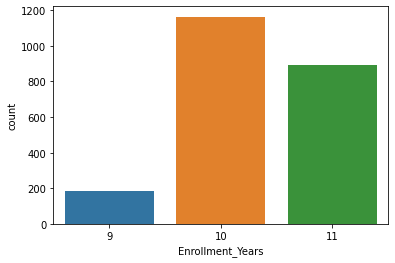

In [22]:
# let us plot count plot for years

sns.countplot(data["Enrollment_Years"])

In [23]:
data["Enrollment_Years"].describe()

count    2240.000000
mean       10.314732
std         0.617995
min         9.000000
25%        10.000000
50%        10.000000
75%        11.000000
max        11.000000
Name: Enrollment_Years, dtype: float64

### Amount EDA


#### Columns for Amount

MntFruits

MntMeatProducts

MntFishProducts

MntSweetProducts

MntGoldProducst

In [24]:
# list for amount columns

amount_col=['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

In [25]:
data[['MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,104,379,111,189,218
1,5,64,7,0,37
2,11,59,15,2,30
3,0,1,0,0,0
4,16,24,11,0,34
...,...,...,...,...,...
2235,18,126,47,48,78
2236,10,13,3,8,16
2237,2,88,15,5,14
2238,38,701,149,165,63


In [26]:

data

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,age,Age_Group,Enrollment_Age,Enrollment_Years
0,1826,0,189,104,379,111,189,218,1,4,...,0,0,0,0,1,0,54,Age_2,3603 days 10:25:07.891479,9
1,1,0,464,5,64,7,0,37,1,7,...,1,0,0,0,1,0,63,Age_3,3604 days 10:25:07.891479,9
2,10476,0,134,11,59,15,2,30,1,3,...,0,0,0,0,0,0,66,Age_3,3637 days 10:25:07.891479,9
3,1386,0,10,0,1,0,0,0,1,1,...,0,0,0,0,0,0,57,Age_2,3639 days 10:25:07.891479,9
4,5371,0,6,16,24,11,0,34,2,3,...,0,1,0,0,1,0,35,Age_1,3672 days 10:25:07.891479,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,99,372,18,126,47,48,78,2,5,...,0,0,0,0,0,0,48,Age_2,4069 days 10:25:07.891479,11
2236,5263,99,5,10,13,3,8,16,1,1,...,0,0,0,0,0,0,47,Age_2,4113 days 10:25:07.891479,11
2237,22,99,185,2,88,15,5,14,2,6,...,0,0,0,0,0,0,48,Age_2,4163 days 10:25:07.891479,11
2238,528,99,267,38,701,149,165,63,1,5,...,0,0,0,0,0,0,46,Age_2,4167 days 10:25:07.891479,11


In [27]:
from scipy.stats import ttest_ind

# Step 3: Statistical Analysis (t-test)


# Perform t-test to compare mean amount spent on different categories between response groups

campaign_groups = data.groupby('Response')

for column in amount_col:
    print(f"\nT-test for {column}:")
    for campaign, group_data in campaign_groups:
        print(f"Response {campaign}:")
        campaign_data = group_data[column]
        print(campaign_data.describe())
    
    t_stat, p_value = ttest_ind(*[group_data[column] for _, group_data in campaign_groups])
    print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-test for MntFruits:
Response 0:
count    1906.000000
mean       24.216684
std        38.191763
min         0.000000
25%         1.000000
50%         7.000000
75%        28.000000
max       199.000000
Name: MntFruits, dtype: float64
Response 1:
count    334.000000
mean      38.203593
std       46.099519
min        0.000000
25%        4.000000
50%       21.000000
75%       53.750000
max      193.000000
Name: MntFruits, dtype: float64
T-statistic: -5.974175513040595, p-value: 2.6831159908783073e-09

T-test for MntMeatProducts:
Response 0:
count    1906.000000
mean      144.624344
std       205.299936
min         0.000000
25%        14.000000
50%        56.000000
75%       192.750000
max      1725.000000
Name: MntMeatProducts, dtype: float64
Response 1:
count    334.000000
mean     294.353293
std      286.890036
min        1.000000
25%       47.750000
50%      174.500000
75%      509.750000
max      981.000000
Name: MntMeatProducts, dtype: float64
T-statistic: -11.506382136666215, p-val

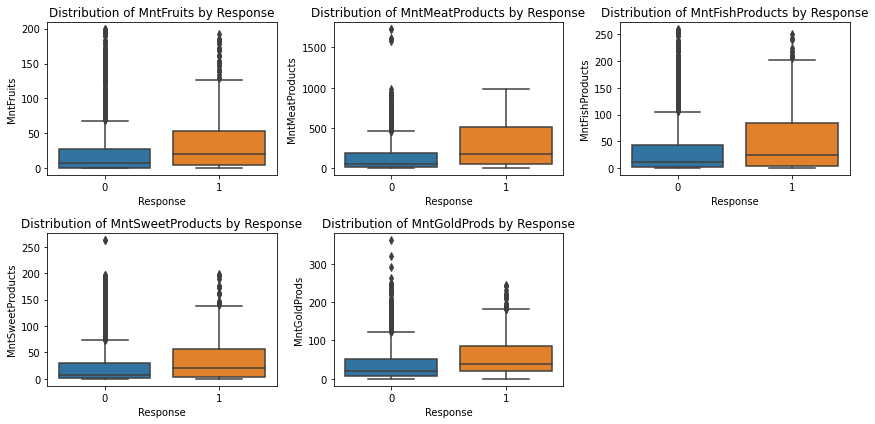

In [28]:

# Step 4: Visualizations (Box Plots)
# Create box plots to visualize the distribution of amount spent on different categories by response
plt.figure(figsize=(12, 6))
for i, column in enumerate(amount_col, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Response', y=column, data=data)
    plt.title(f'Distribution of {column} by Response')
plt.tight_layout()
plt.show()

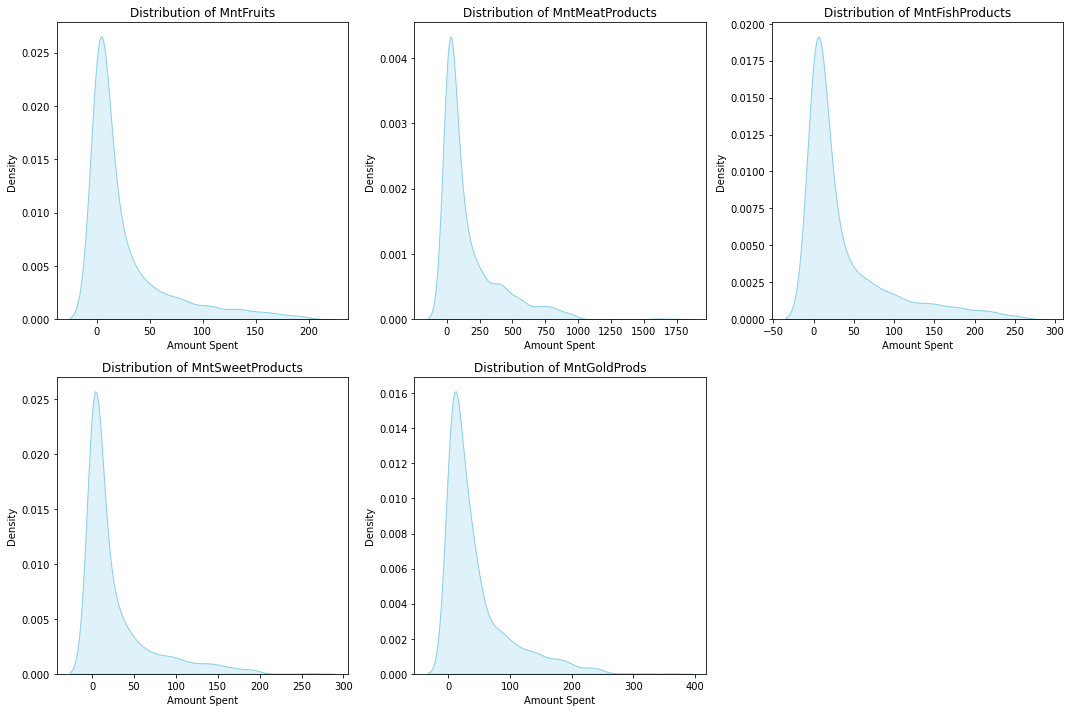

In [29]:
# Create subplots for each column

# Create subplots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(amount_col, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[column], color='skyblue', shade=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Amount Spent')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

### Lets us check amoun spent on different categories

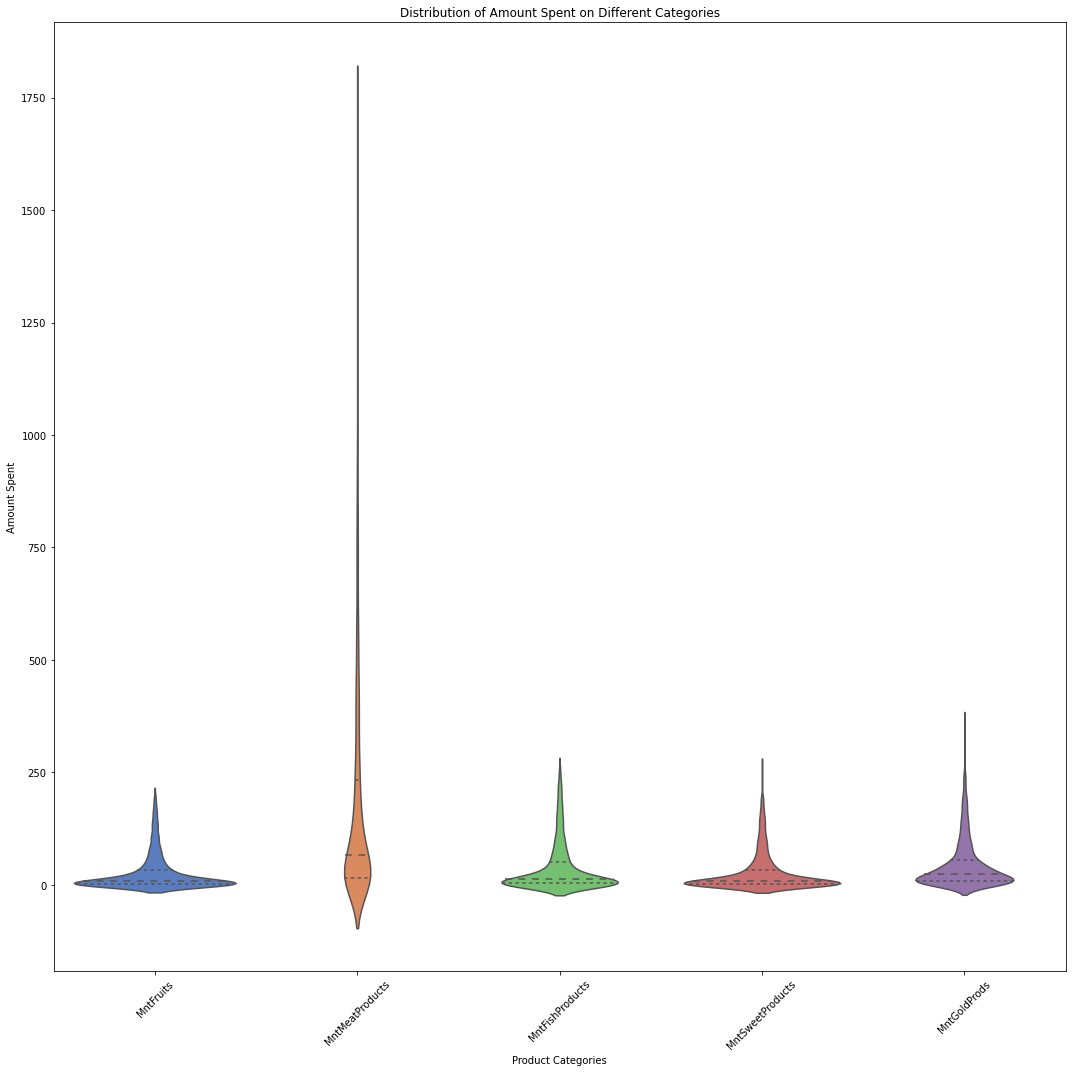

In [30]:
# Create violin plot
plt.figure(figsize=(15, 15))
sns.violinplot(data=data[amount_col], inner="quartile", palette="muted")
plt.title('Distribution of Amount Spent on Different Categories')
plt.xlabel('Product Categories')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lets see response for each marketing campaign

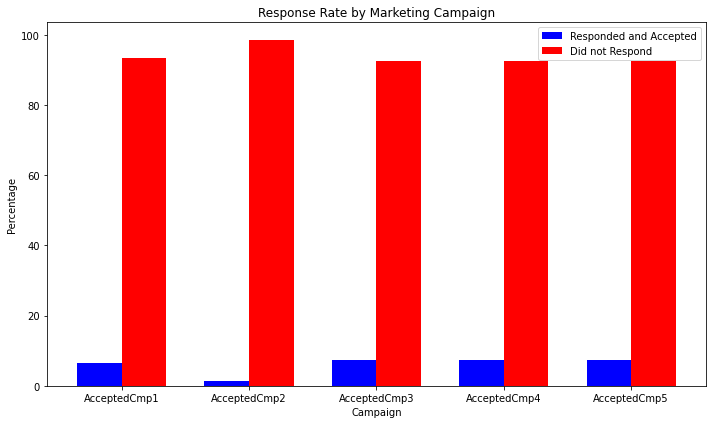

In [31]:
# Select columns for marketing campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate the response rate for each campaign
response_rates = (data[campaign_columns].mean() * 100).round(2)

# Calculate the percentage of customers who responded and accepted the offer
responded = data[campaign_columns].sum() / len(data) * 100
not_responded = 100 - responded

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(campaign_columns))
plt.bar(index, responded, bar_width, label='Responded and Accepted', color='b')
plt.bar([i + bar_width for i in index], not_responded, bar_width, label='Did not Respond', color='r')
plt.xlabel('Campaign')
plt.ylabel('Percentage')
plt.title('Response Rate by Marketing Campaign')
plt.xticks([i + bar_width / 2 for i in index], campaign_columns)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 720x1800 with 0 Axes>

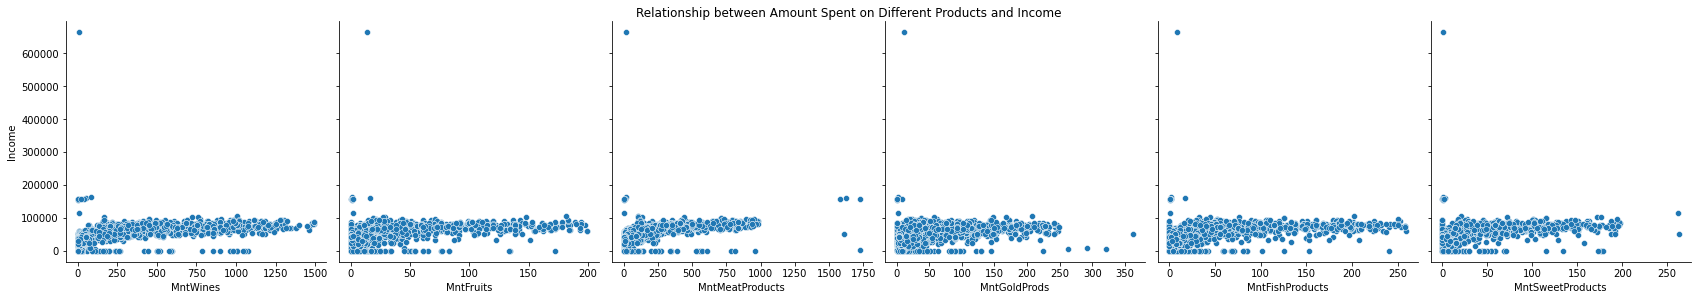

In [32]:

# Select columns for analysis
columns_of_interest = ['Income', 'MntWines','MntFruits', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts',"MntSweetProducts"]

# Create pairplot to visualize relationships
plt.figure(figsize=(10,25))
sns.pairplot(data[columns_of_interest], x_vars=['MntWines','MntFruits', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts',"MntSweetProducts"], y_vars=['Income'], kind='scatter', height=4)
plt.suptitle('Relationship between Amount Spent on Different Products and Income', y=1.02)
plt.show()

In [33]:
# Define recent and older customers based on the year they became a customer
recent_customers = data[data['Enrollment_Years'] >= 8]   # Example: Recent customers became customers after 2019
older_customers = data[data['Enrollment_Years'] < 8]   # Older customers became customers before 2019

# Calculate the mean number of complaints for recent and older customers
mean_complaints_recent = recent_customers['Complain'].mean()
mean_complaints_older = older_customers['Complain'].mean()

# Perform a t-test to compare the mean number of complaints between recent and older customers
t_stat, p_value = ttest_ind(recent_customers['Complain'], older_customers['Complain'])

# Print the results
print(f"Mean number of complaints for recent customers: {mean_complaints_recent:.2f}")
print(f"Mean number of complaints for older customers: {mean_complaints_older:.2f}")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in the mean number of complaints between recent and older customers.")
else:
    print("There is no statistically significant difference in the mean number of complaints between recent and older customers.")

Mean number of complaints for recent customers: 0.01
Mean number of complaints for older customers: nan
T-statistic: nan, p-value: nan
There is no statistically significant difference in the mean number of complaints between recent and older customers.


### Response and Campaign Data Quality correction

In [34]:
# Let us make a count of "1" and "0" before making any corrections

data["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [35]:
data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,0,0,0
2237,0,0,0,0,0,0
2238,0,0,0,0,0,0


### As we can see that for eg the first row is a wrong data as the response is taken as 1 even if all the campaingns are 0 

There are two scenarios where the data is not fit for the further Process

1) if all the campaign data = 0 but "Response" is recorded as 1
2) if one of the campaign is 1 but "Response" is recorded as 0

In [36]:
# Check for both scenarios
scenario_1_2 = data[((data['AcceptedCmp1'] == 0) & (data['AcceptedCmp2'] == 0) & (data['AcceptedCmp3'] == 0) & (data['AcceptedCmp4'] == 0) & (data['AcceptedCmp5'] == 0) & (data['Response'] == 1)) |
                    (((data['AcceptedCmp1'] == 1) | (data['AcceptedCmp2'] == 1) | (data['AcceptedCmp3'] == 1) | (data['AcceptedCmp4'] == 1) | (data['AcceptedCmp5'] == 1)) & (data['Response'] == 0))]


In [37]:


scenario_1_2[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
5,0,0,0,0,0,1
12,0,0,0,0,0,1
16,0,0,0,0,0,1
40,0,0,0,0,0,1
...,...,...,...,...,...,...
2207,0,1,0,1,1,0
2208,0,1,0,1,1,0
2210,0,0,0,1,0,0
2217,0,0,0,1,0,0


# percentage of rows that meet scenario_1_2


In [38]:
percentage_sc_1_2=(scenario_1_2.shape[0]/data.shape[0])*100

print(f'The percentage of the rows that meet Scenario 1 and 2 : {round(percentage_sc_1_2,2)}')

The percentage of the rows that meet Scenario 1 and 2 : 18.79


# since the percentage is more we will not delete the rows but correct them 

1) If all the campaings data is 0 response should be 0 
2) if any of the campaign data is 1 the response should be 1

In [39]:
# Correcting Scenario 1: Set response to 0 where all campaign data is 0
data.loc[((data['AcceptedCmp1'] == 0) & (data['AcceptedCmp2'] == 0) & (data['AcceptedCmp3'] == 0) & (data['AcceptedCmp4'] == 0) & (data['AcceptedCmp5'] == 0)), 'Response'] = 0

# Correcting Scenario 2: Set response to 1 where any of the campaign data is 1
data.loc[(((data['AcceptedCmp1'] == 1) | (data['AcceptedCmp2'] == 1) | (data['AcceptedCmp3'] == 1) | (data['AcceptedCmp4'] == 1) | (data['AcceptedCmp5'] == 1)) & (data['Response'] == 0)), 'Response'] = 1


In [40]:
data["Response"].value_counts()

0    1777
1     463
Name: Response, dtype: int64

In [41]:
data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,0
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
2235,0,0,0,0,0,0
2236,0,0,0,0,0,0
2237,0,0,0,0,0,0
2238,0,0,0,0,0,0


### Data looks Good now 

### Hypothesis Testing

### Hypothesis 1: Customers who spend more on wines are more likely to respond positively to marketing campaigns promoting wine-related products.

the p value is 2.9561909421349646e-121
The amount spent on wines significantly differs between customers who responded and those who did not respond to marketing campaigns.


<Figure size 576x432 with 0 Axes>

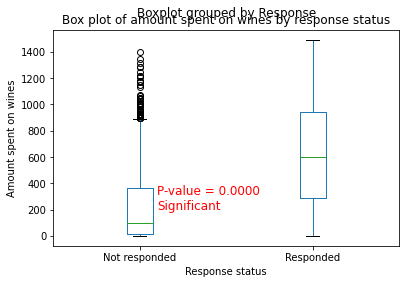

<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
# Define the variables
category = 'MntWines'  # Amount spent on wines
response_column = 'Response'  # Response column in your dataset

# Split data into groups based on response (0 = not responded, 1 = responded)
responded = data[data[response_column] == 1][category]
not_responded = data[data[response_column] == 0][category]

# Perform t-test to compare means of amount spent on wines between responded and not responded groups
t_stat, p_value = stats.ttest_ind(responded, not_responded)

# Define significance level
alpha = 0.05

# Visualization - Box plot of amount spent on wines by response status
plt.figure(figsize=(8, 6))
data.boxplot(column=category, by=response_column, grid=False)
plt.title("Box plot of amount spent on wines by response status")
plt.ylabel("Amount spent on wines")
plt.xlabel("Response status")
plt.xticks([1, 2], ['Not responded', 'Responded'])

# Annotate the p-value on the plot
if p_value < alpha:
    plt.text(1.1, 200, f'P-value = {p_value:.4f}\nSignificant', fontsize=12, color='red')
else:
    plt.text(1.1, 200, f'P-value = {p_value:.4f}\nNot significant', fontsize=12, color='green')
    
    
# Print p value
print(f'the p value is {p_value}')
    
# Print the result
if p_value < alpha:
    print("The amount spent on wines significantly differs between customers who responded and those who did not respond to marketing campaigns.")
else:
    print("There is no significant difference in the amount spent on wines between customers who responded and those who did not respond to marketing campaigns.")


plt.figure(figsize=(15,15))
plt.show()
plt.tight_layout()

The degree of freedom is 2238


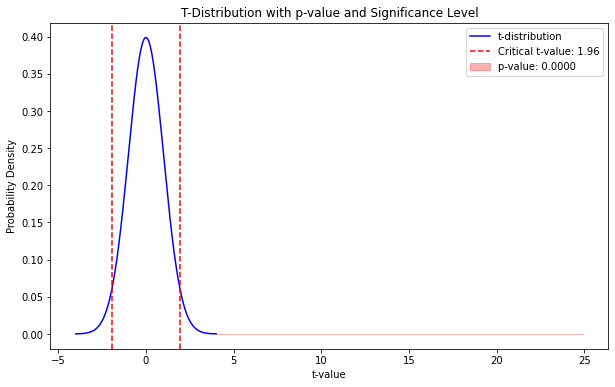

In [52]:
import scipy.stats as stats
# Define degrees of freedom for t-distribution
df = len(responded) + len(not_responded) - 2  # Degrees of freedom
print(f"The degree of freedom is {df}")

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Plot t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, df), 'b-', label='t-distribution')

# Plot vertical lines at critical t-values for two-tailed test
t_critical = stats.t.ppf(1 - alpha / 2, df)
plt.axvline(t_critical, color='r', linestyle='--', label=f'Critical t-value: {t_critical:.2f}')
plt.axvline(-t_critical, color='r', linestyle='--')

# Shade area under the curve corresponding to the p-value
if t_stat > 0:
    p_value_area = np.linspace(t_stat, 4, 1000)
else:
    p_value_area = np.linspace(-4, t_stat, 1000)
plt.fill_between(p_value_area, 0, stats.t.pdf(p_value_area, df), color='red', alpha=0.3, label=f'p-value: {p_value:.4f}')

# Add legend and labels
plt.legend()
plt.title('T-Distribution with p-value and Significance Level')
plt.xlabel('t-value')
plt.ylabel('Probability Density')

plt.show()

### Hypothesis 2: Customers who spend more on fruits are more likely to respond positively to health-focused marketing campaigns.

the p value is 3.0950001315024603e-10
The amount spent on fruits significantly differs between customers who responded and those who did not respond to marketing campaigns.


<Figure size 576x432 with 0 Axes>

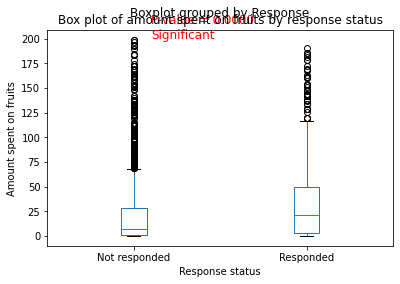

<Figure size 1080x1080 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [55]:
# Define the variables
category = 'MntFruits'  # Amount spent on fruits

# Split data into groups based on response (0 = not responded, 1 = responded)
responded_fruits = data[data[response_column] == 1][category]
not_responded_fruits = data[data[response_column] == 0][category]

# Perform t-test to compare means of amount spent on fruits between responded and not responded groups
t_stat_fruits, p_value_fruits = stats.ttest_ind(responded_fruits, not_responded_fruits)

# Define significance level
alpha = 0.05

# Visualization - Box plot of amount spent on fruits by response status
plt.figure(figsize=(8, 6))
data.boxplot(column=category, by=response_column, grid=False)
plt.title("Box plot of amount spent on fruits by response status")
plt.ylabel("Amount spent on fruits")
plt.xlabel("Response status")
plt.xticks([1, 2], ['Not responded', 'Responded'])

# Annotate the p-value on the plot
if p_value_fruits < alpha:
    plt.text(1.1, 200, f'P-value = {p_value_fruits:.4f}\nSignificant', fontsize=12, color='red')
else:
    plt.text(1.1, 200, f'P-value = {p_value_fruits:.4f}\nNot significant', fontsize=12, color='green')
    
# Print p value
print(f'the p value is {p_value_fruits}')
    
# Print the result
if p_value_fruits < alpha:
    print("The amount spent on fruits significantly differs between customers who responded and those who did not respond to marketing campaigns.")
else:
    print("There is no significant difference in the amount spent on fruits between customers who responded and those who did not respond to marketing campaigns.")

plt.figure(figsize=(15,15))
plt.show()
plt.tight_layout()

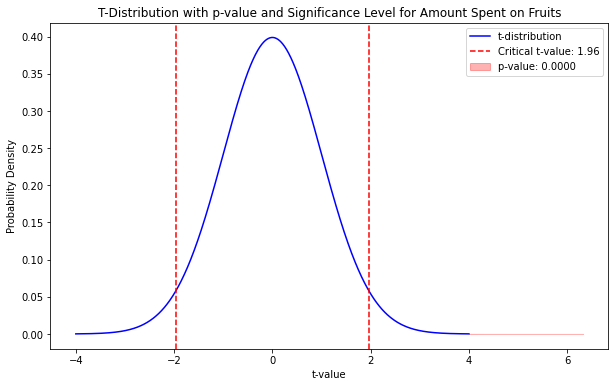

In [56]:
# Define degrees of freedom for t-distribution
df_fruits = len(responded_fruits) + len(not_responded_fruits) - 2  # Degrees of freedom

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Plot t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, df_fruits), 'b-', label='t-distribution')

# Plot vertical lines at critical t-values for two-tailed test
t_critical_fruits = stats.t.ppf(1 - alpha / 2, df_fruits)
plt.axvline(t_critical_fruits, color='r', linestyle='--', label=f'Critical t-value: {t_critical_fruits:.2f}')
plt.axvline(-t_critical_fruits, color='r', linestyle='--')

# Shade area under the curve corresponding to the p-value
if t_stat_fruits > 0:
    p_value_area_fruits = np.linspace(t_stat_fruits, 4, 1000)
else:
    p_value_area_fruits = np.linspace(-4, t_stat_fruits, 1000)
plt.fill_between(p_value_area_fruits, 0, stats.t.pdf(p_value_area_fruits, df_fruits), color='red', alpha=0.3, label=f'p-value: {p_value_fruits:.4f}')

# Add legend and labels
plt.legend()
plt.title('T-Distribution with p-value and Significance Level for Amount Spent on Fruits')
plt.xlabel('t-value')
plt.ylabel('Probability Density')

plt.show()

### Hypothesis 3: There is no significant relationship between the amount spent on meat products and the response rates in marketing campaigns.

In [57]:
# Define the variables
category = 'MntMeatProducts'  # Amount spent on meat products

# Split data into groups based on response (0 = not responded, 1 = responded)
responded_meat = data[data[response_column] == 1][category]
not_responded_meat = data[data[response_column] == 0][category]

# Perform t-test to compare means of amount spent on meat products between responded and not responded groups
t_stat_meat, p_value_meat = stats.ttest_ind(responded_meat, not_responded_meat)

# Define significance level
alpha = 0.05

# Print p value
print(f'The p-value for hypothesis testing is: {p_value_meat}')

# Print the result
if p_value_meat < alpha:
    print("The amount spent on meat products significantly differs between customers who responded and those who did not respond to marketing campaigns.")
else:
    print("There is no significant difference in the amount spent on meat products between customers who responded and those who did not respond to marketing campaigns.")

The p-value for hypothesis testing is: 1.620540963756365e-41
The amount spent on meat products significantly differs between customers who responded and those who did not respond to marketing campaigns.


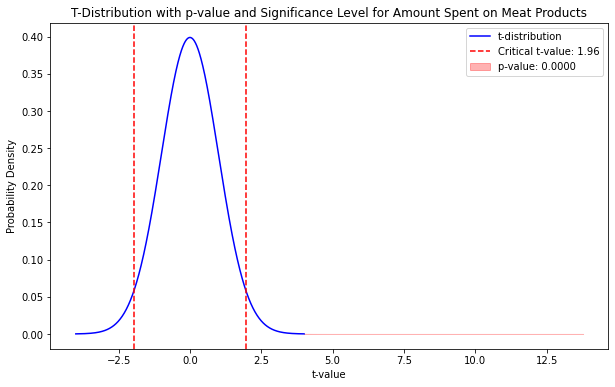

In [58]:
# Define degrees of freedom for t-distribution
df_meat = len(responded_meat) + len(not_responded_meat) - 2  # Degrees of freedom

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Plot t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, df_meat), 'b-', label='t-distribution')

# Plot vertical lines at critical t-values for two-tailed test
t_critical_meat = stats.t.ppf(1 - alpha / 2, df_meat)
plt.axvline(t_critical_meat, color='r', linestyle='--', label=f'Critical t-value: {t_critical_meat:.2f}')
plt.axvline(-t_critical_meat, color='r', linestyle='--')

# Shade area under the curve corresponding to the p-value
if t_stat_meat > 0:
    p_value_area_meat = np.linspace(t_stat_meat, 4, 1000)
else:
    p_value_area_meat = np.linspace(-4, t_stat_meat, 1000)
plt.fill_between(p_value_area_meat, 0, stats.t.pdf(p_value_area_meat, df_meat), color='red', alpha=0.3, label=f'p-value: {p_value_meat:.4f}')

# Add legend and labels
plt.legend()
plt.title('T-Distribution with p-value and Significance Level for Amount Spent on Meat Products')
plt.xlabel('t-value')
plt.ylabel('Probability Density')

plt.show()

### Hypothesis 4: Customers who spend more on fish products are more likely to respond positively to marketing campaigns promoting seafood specials or cooking classes.

In [59]:
# Define the variables
category = 'MntFishProducts'  # Amount spent on fish products

# Split data into groups based on response (0 = not responded, 1 = responded)
responded_fish = data[data[response_column] == 1][category]
not_responded_fish = data[data[response_column] == 0][category]

# Perform t-test to compare means of amount spent on fish products between responded and not responded groups
t_stat_fish, p_value_fish = stats.ttest_ind(responded_fish, not_responded_fish)

# Define significance level
alpha = 0.05

# Print p value
print(f'The p-value for hypothesis testing is: {p_value_fish}')

# Print the result
if p_value_fish < alpha:
    print("The amount spent on fish products significantly differs between customers who responded and those who did not respond to marketing campaigns.")
else:
    print("There is no significant difference in the amount spent on fish products between customers who responded and those who did not respond to marketing campaigns.")

The p-value for hypothesis testing is: 5.351004838201368e-15
The amount spent on fish products significantly differs between customers who responded and those who did not respond to marketing campaigns.


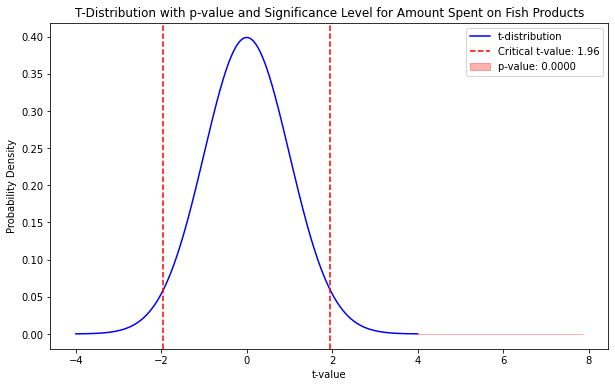

In [60]:
# Define degrees of freedom for t-distribution
df_fish = len(responded_fish) + len(not_responded_fish) - 2  # Degrees of freedom

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Plot t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, df_fish), 'b-', label='t-distribution')

# Plot vertical lines at critical t-values for two-tailed test
t_critical_fish = stats.t.ppf(1 - alpha / 2, df_fish)
plt.axvline(t_critical_fish, color='r', linestyle='--', label=f'Critical t-value: {t_critical_fish:.2f}')
plt.axvline(-t_critical_fish, color='r', linestyle='--')

# Shade area under the curve corresponding to the p-value
if t_stat_fish > 0:
    p_value_area_fish = np.linspace(t_stat_fish, 4, 1000)
else:
    p_value_area_fish = np.linspace(-4, t_stat_fish, 1000)
plt.fill_between(p_value_area_fish, 0, stats.t.pdf(p_value_area_fish, df_fish), color='red', alpha=0.3, label=f'p-value: {p_value_fish:.4f}')

# Add legend and labels
plt.legend()
plt.title('T-Distribution with p-value and Significance Level for Amount Spent on Fish Products')
plt.xlabel('t-value')
plt.ylabel('Probability Density')

plt.show()

### Hypothesis 5: There is a positive correlation between the amount spent on sweets and the response rates in marketing campaigns targeting family-oriented or holiday-themed promotions.

In [61]:
# Define the variables
category = 'MntSweetProducts'  # Amount spent on sweets

# Split data into groups based on response (0 = not responded, 1 = responded)
responded_sweets = data[data[response_column] == 1][category]
not_responded_sweets = data[data[response_column] == 0][category]

# Perform t-test to compare means of amount spent on sweets between responded and not responded groups
t_stat_sweets, p_value_sweets = stats.ttest_ind(responded_sweets, not_responded_sweets)

# Define significance level
alpha = 0.05

# Print p value
print(f'The p-value for hypothesis testing is: {p_value_sweets}')

# Print the result
if p_value_sweets < alpha:
    print("The amount spent on sweets significantly differs between customers who responded and those who did not respond to marketing campaigns.")
else:
    print("There is no significant difference in the amount spent on sweets between customers who responded and those who did not respond to marketing campaigns.")

The p-value for hypothesis testing is: 2.222422096548862e-14
The amount spent on sweets significantly differs between customers who responded and those who did not respond to marketing campaigns.


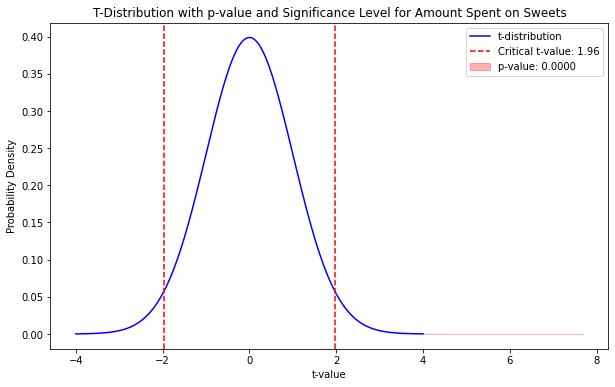

In [62]:
# Define degrees of freedom for t-distribution
df_sweets = len(responded_sweets) + len(not_responded_sweets) - 2  # Degrees of freedom

# Generate x values for the t-distribution curve
x = np.linspace(-4, 4, 1000)

# Plot t-distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, stats.t.pdf(x, df_sweets), 'b-', label='t-distribution')

# Plot vertical lines at critical t-values for two-tailed test
t_critical_sweets = stats.t.ppf(1 - alpha / 2, df_sweets)
plt.axvline(t_critical_sweets, color='r', linestyle='--', label=f'Critical t-value: {t_critical_sweets:.2f}')
plt.axvline(-t_critical_sweets, color='r', linestyle='--')

# Shade area under the curve corresponding to the p-value
if t_stat_sweets > 0:
    p_value_area_sweets = np.linspace(t_stat_sweets, 4, 1000)
else:
    p_value_area_sweets = np.linspace(-4, t_stat_sweets, 1000)
plt.fill_between(p_value_area_sweets, 0, stats.t.pdf(p_value_area_sweets, df_sweets), color='red', alpha=0.3, label=f'p-value: {p_value_sweets:.4f}')

# Add legend and labels
plt.legend()
plt.title('T-Distribution with p-value and Significance Level for Amount Spent on Sweets')
plt.xlabel('t-value')
plt.ylabel('Probability Density')

plt.show()